<a href="https://colab.research.google.com/github/zaccowan/MLA_ZSC/blob/main/MLA5_ZSC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment #  

Working with land satellite data:

 https://archive-beta.ics.uci.edu/ml/datasets/statlog+landsat+satellite.

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
# Imports for Voting, Bagging, Random Forest and AdaBoost classifiers
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier

# Imports for Performance Measures

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [5]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [6]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [7]:
landsat_train = pd.read_csv("/content/drive/MyDrive/MLA/MLA5/landsat_train.csv")

In [8]:
landsat_test = pd.read_csv("/content/drive/MyDrive/MLA/MLA5/landsat_test.csv")

# Statistical and Visual Exploration

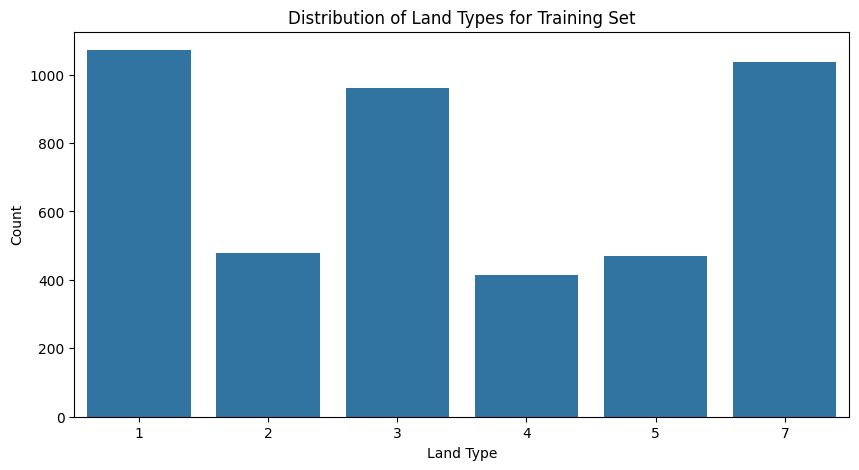

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(x="land_type", y="count", data=pd.DataFrame(landsat_train["land_type"].value_counts()) )
plt.title("Distribution of Land Types for Training Set")
plt.ylabel("Count")
plt.xlabel("Land Type")
plt.show()

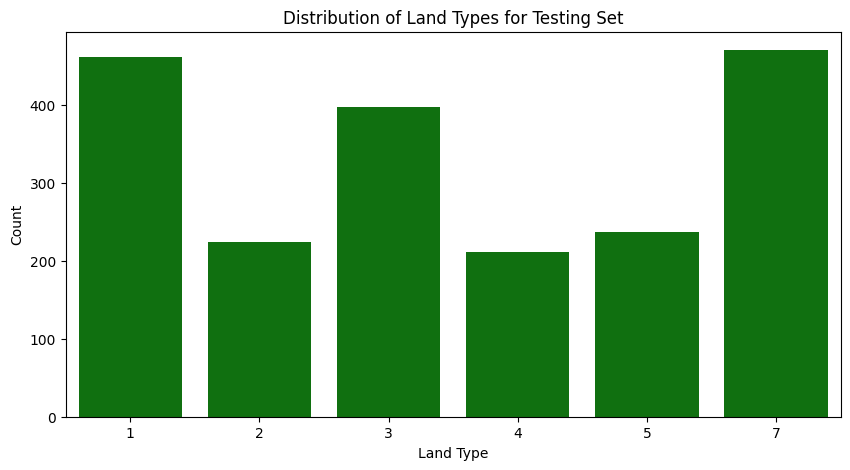

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x="land_type", y="count", data=pd.DataFrame(landsat_test["land_type"].value_counts()), color="green" )
plt.title("Distribution of Land Types for Testing Set")
plt.ylabel("Count")
plt.xlabel("Land Type")
plt.show()

In [11]:
landsat_train["land_type"].value_counts()

,count
land_type,
1,1072
7,1038
3,961
2,479
5,470
4,415


In [12]:
landsat_test["land_type"].value_counts()

,count
land_type,
7,470
1,461
3,397
5,237
2,224
4,211


# Statistical Analysis Results

Both the training and test data set have approximately the same distribution of land types. The test set has less overall data points which is as expected.

The order of most frequent land type is approximately as follows (greatest to least):
1. Land Type 1
2. Land Type 7
3. Land Type 3
4. Land Type 5 / Land Type 2
5. Land Type 4

There is no land type 6 in our data.


### Splitting Data into Train/Test

In [13]:
# Training Splits
x_train = landsat_train.drop("land_type", axis=1)
y_train = landsat_train["land_type"]

# Testing Splits
x_test = landsat_test.drop("land_type", axis=1)
y_test = landsat_test["land_type"]

### Building the Pipeline

In [14]:
numerical_cols = x_train.select_dtypes(include="number").columns
categorical_cols = x_train.select_dtypes(include="object").columns

numerical_transformer = Pipeline(steps=[
    ("scaler", MinMaxScaler())
])


In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", 'passthrough', categorical_cols)
    ]
)

### Executing the Model

In [16]:
pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                           ("classifier", RandomForestClassifier())])
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['top_left_r', 'top_left_g', 'top_left_infra1', 'top_left_infra2',
       'top_middle_r', 'top_middle_g', 'top_middle_infra1',
       'top_middle_infra2', 'top_right_r', 'top_right_g', 'top_right_infra1',
       'top_right_infra2', 'middle_left_r', 'middle_left_g...
       'middle_right_infra2', 'bottom_left_r', 'bottom_left_g',
       'bottom_left_infra1', 'bottom_left_infra2', 'bottom_middle_r',
       'bottom_middle_g', 'bottom_middle_infra1', 'bottom_middle_infra2',
       'bottom_right_r', 'bottom_right_g', 'bottom_right_infra1',
       'bottom_right_infra2'],
      dtype='object')),
                                                 ('cat', 'passthrough',
                                                  Index([], dtype='object'))])),
                ('classifier', RandomForestClassifier())])

### Evaluating Model

In [17]:
y_pred = pipeline.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.9125
Classification Report: 
               precision    recall  f1-score   support

           1       0.97      0.99      0.98       461
           2       0.97      0.97      0.97       224
           3       0.90      0.95      0.92       397
           4       0.79      0.65      0.72       211
           5       0.92      0.89      0.90       237
           7       0.88      0.91      0.89       470

    accuracy                           0.91      2000
   macro avg       0.91      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000



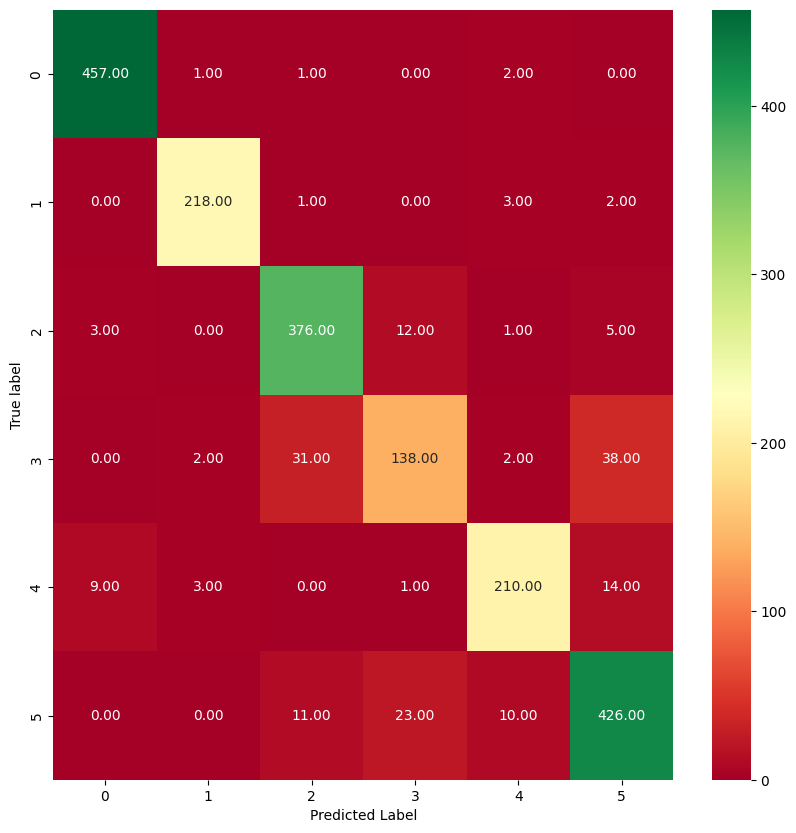

In [18]:
plot_cm(y_test, y_pred)

### Conclusion
Our Random Forest Classifier performed okay. Here are some obeservations from the confusion matrix:

The model does seem to confuse label 3 and 5 somewhat frequently.
Label 3 was incorrectly predicted as label 2 a significant number of times.

<br>

**Based on the classification report:**

Precision Score:
- Land Types 3 and 7 have lower precision scores compared to some of the others.
- Land Type 4 has a significantly lower precision score - 78%



This lower precisions is also visible in the results of the confusion matrix.

Recall Score:
- Land Type 4 has an extremely low recall of 64%

The low recall score means that our classification model only made correct predictions on test data 64% of the time for Land Type 4.


F1-Score:
- Land Type 4 has a low F1 score which, again, is indicated by the low precision and recalls.


The model performed well for certain Land Types but performed very poorly for Land Type 4.

# Problem 2

### Building the Pipeline

In [19]:
numerical_cols = x_train.select_dtypes(include="number").columns
categorical_cols = x_train.select_dtypes(include="object").columns

numerical_transformer = Pipeline(steps=[
    ("scaler", MinMaxScaler())
])


In [20]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", 'passthrough', categorical_cols)
    ]
)

### Executing the Model

In [21]:
pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                           ('classifier', VotingClassifier(estimators=[
                               ('dt', DecisionTreeClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('ada', AdaBoostClassifier(estimator=DecisionTreeClassifier()))
                           ], voting='hard'))
                           ])
problem2_model = pipeline.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


### Evaluating Model

In [22]:
y_pred = pipeline.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.864
Classification Report: 
               precision    recall  f1-score   support

           1       0.95      0.97      0.96       461
           2       0.97      0.97      0.97       224
           3       0.87      0.88      0.87       397
           4       0.57      0.56      0.57       211
           5       0.88      0.83      0.85       237
           7       0.84      0.85      0.85       470

    accuracy                           0.86      2000
   macro avg       0.85      0.84      0.85      2000
weighted avg       0.86      0.86      0.86      2000



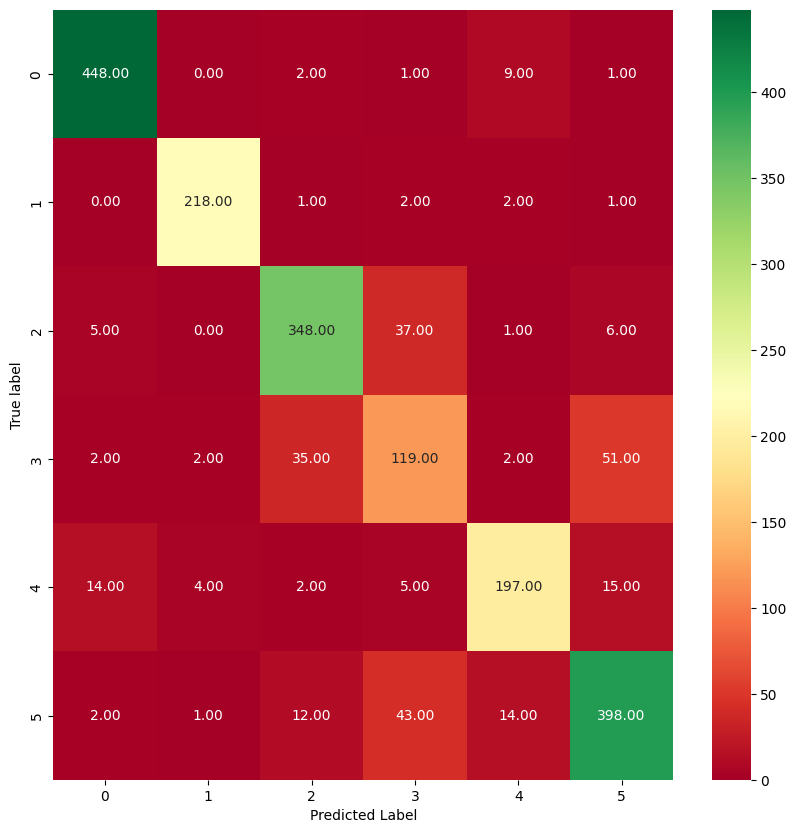

In [23]:
plot_cm(y_test, y_pred)

### Conclusion
Our Voting Classifier performed slightly worse than the Random Forest Classifier. Here are some obeservations from the confusion matrix:

The model does seem to confuse label 3 and 5 somewhat frequently as well as label 2 and 3.

<br>

**Based on the classification report:**

Precision Score:
- Land Type 4 has an extremely low precision score.

This lower precisions is also visible in the results of the confusion matrix.

Recall Score:
- Land Type 4 has an extremely low recall of 61%

The low recall score means that our classification model only made correct predictions on test data 61% of the time for Land Type 4.


F1-Score:
- Land Type 4 has a low F1 score which, again, is indicated by the low precision and recalls.


The model performed well for certain Land Types but performed very poorly for Land Type 4.

## Problem 3

### Reading the Data

In [24]:
df = pd.read_csv("/content/drive/MyDrive/MLA/MLA4/Steel_industry_data.csv")
df.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [25]:
df.rename(columns={
    "Usage_kWh": "usage_kwh",
    "Lagging_Current_Reactive.Power_kVarh": "lag_react_pwr_kvarh",
    "Leading_Current_Reactive_Power_kVarh": "lead_react_pwr_kvarh",
    "Lagging_Current_Power_Factor": "lag_current_pwr",
    "Leading_Current_Power_Factor": "lead_current_pwr",
    "NSM": "nsm",
    "WeekStatus": "week_status",
    "Day_of_week": "day_of_week",
    "Load_Type": "load_type"},
             inplace=True
             )

In [26]:
df.sample(5)

,date,usage_kwh,lag_react_pwr_kvarh,lead_react_pwr_kvarh,CO2(tCO2),lag_current_pwr,lead_current_pwr,nsm,week_status,day_of_week,load_type
2103,22/01/2018 22:00,39.78,1.01,1.69,0.02,99.97,99.91,79200,Weekday,Monday,Medium_Load
4429,16/02/2018 03:30,3.38,3.78,0.00,0.00,66.66,100.00,12600,Weekday,Friday,Light_Load
1388,15/01/2018 11:15,99.25,69.55,0.00,0.05,81.89,100.00,40500,Weekday,Monday,Maximum_Load
18812,15/07/2018 23:15,2.77,0.00,5.33,0.00,100.00,46.11,83700,Weekend,Sunday,Light_Load
2530,27/01/2018 08:45,32.80,19.15,0.00,0.02,86.36,100.00,31500,Weekend,Saturday,Light_Load


### Splitting Data into Train/Test

In [57]:
x = df.drop(["date", "load_type"], axis=1)
y = df["load_type"]

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [59]:
numerical_transformer = Pipeline(steps=[
    ("scaler", MinMaxScaler())
])
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(sparse_output=False, drop="first"))
])

In [60]:
numerical_cols = x.select_dtypes(include="number").columns
categorical_cols = x.select_dtypes(include="object").columns

In [61]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

### Executing the Model

In [62]:
pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                           ("classifier", RandomForestClassifier())])
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['usage_kwh', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh', 'CO2(tCO2)',
       'lag_current_pwr', 'lead_current_pwr', 'nsm'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  Index(['week_status', 'day_of_week'], dtype='object'))])),
                ('classifier', RandomForestClassifier())])

### Evaluating Model

In [63]:
y_pred = pipeline.predict(x_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy:  0.9049657534246576
Classification Report: 
               precision    recall  f1-score   support

  Light_Load       0.97      0.98      0.98      3572
Maximum_Load       0.82      0.83      0.82      1499
 Medium_Load       0.84      0.83      0.83      1937

    accuracy                           0.90      7008
   macro avg       0.88      0.88      0.88      7008
weighted avg       0.90      0.90      0.90      7008



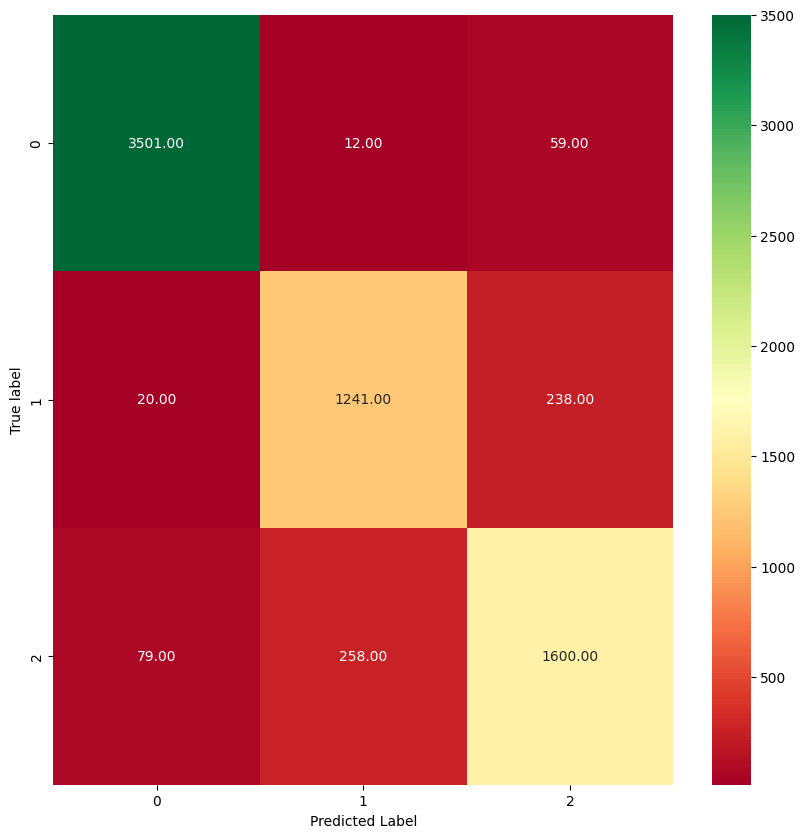

In [64]:
plot_cm(y_test, y_pred)

### Conclusion
Our Random Forest Classifier was able to predict light_loads very well. The model performed alright in predicting maximum and medium load.


<br>

**Based on the classification report:**

Precision Score:
- Light load boasted an extremely good precision score of 98%.
- Maximum load and medium load had acceptable precision scores in the low 80s.

Recall Score:
- Light load boasted an extremely good recall score of 98%.
- Maximum load and medium load had acceptable recall scores in the low 80s.

The low recall score means that our classification model only made correct predictions on test data 61% of the time for Land Type 4.


F1-Score:
- Light load boasted an extremely good F1 score of 98%.
- Maximum load and medium load had acceptable F1 scores in the low 80s.


The model performed well across the board but did have some tendancy to confuse maximum loads with medium loads.